In [1]:
import os
import numpy as np
import math

import torch
from pytorch_grad_cam import GradCAM 

from modelwrapper import Modelwrapper
from gcam_utils import run_save_gcam_results

In [2]:
# specify input files
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_name = 'regnety_32'
pheno_name = 'glaucoma'

cmodel_ckpt = f'../model_ckpt/{pheno_name}_{model_name}_v0.pth'
csv_file = f'../result_biomarker_interpretation/input_imgs/imgs_{pheno_name}.csv'
img_dir = '../result_biomarker_interpretation/input_imgs/'
result_dir = '../result_biomarker_interpretation/'

['image_0_glaucoma_1.png', 'image_1_glaucoma_1.png', 'image_2_glaucoma_1.png', 'image_3_glaucoma_1.png']
['image_4_glaucoma_0.png', 'image_5_glaucoma_0.png', 'image_6_glaucoma_0.png', 'image_7_glaucoma_0.png']


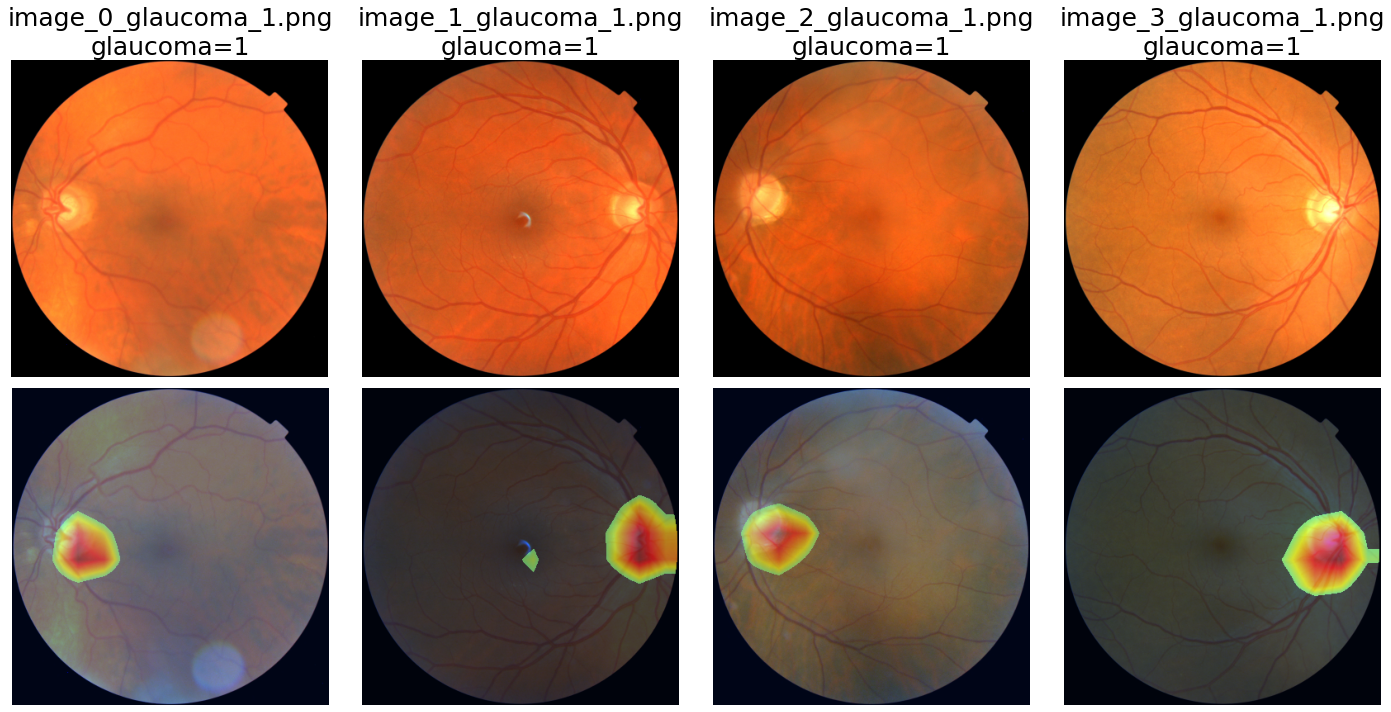

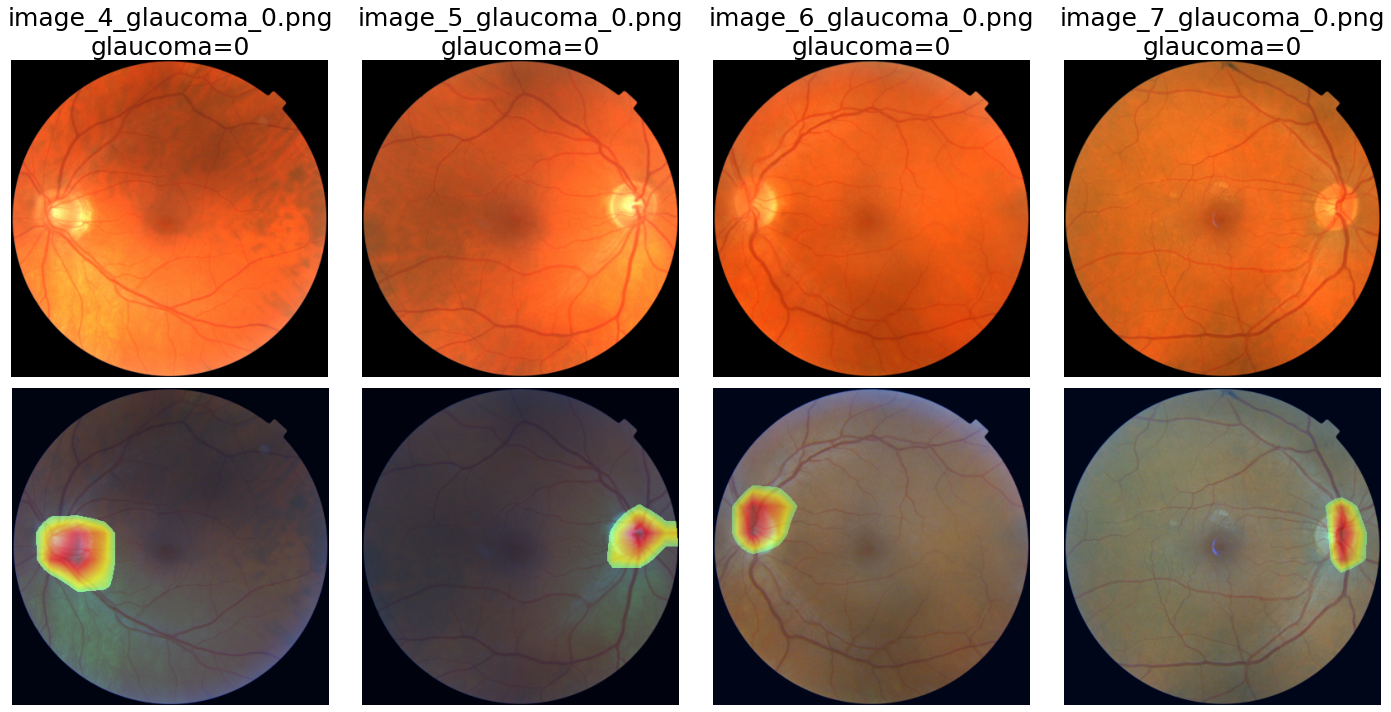

In [3]:
# run gradCAM to generate figures for biomarker interpretation
num_classes = 1 if pheno_name=='age' else 2
mwrapper = Modelwrapper(num_classes=num_classes)
cmodel = getattr(mwrapper, model_name)().to(device)
cmodel.load_state_dict(torch.load(cmodel_ckpt))
cmodel.eval()

target_layers = [cmodel.s4.b1.conv3.conv]

use_cuda = True if device.type=='cuda' else False
cam = GradCAM(model=cmodel, target_layers=target_layers, use_cuda=True)

run_save_gcam_results(cam=cam,
                      img_dir=img_dir,
                      result_dir=result_dir,
                      csv_file=csv_file,
                      pheno_name=pheno_name)